### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [15]:
# Reading the CSV file and putting the content in a pandas dataframe named 'data'
data = pd.read_csv('data/coupons.csv')

In [16]:
data.shape
# checking the size of the data frame i.e. number of rows and columns

(12684, 26)

In [17]:
# Show sample data 
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [18]:
# See column types using the data.info() method
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

2. Investigate the dataset for missing or problematic data.

In [19]:
# Find if data has any duplicates, find the number of records which are duplicate
# Use the function data.duplicated(keep= False) to filter all the duplicates
duplicates = data[data.duplicated(keep=False)]
duplicatesCount = duplicates.shape
duplicatesCount


(148, 26)

In [20]:
#dorpping duplicate records
data= data.drop_duplicates()
data.shape

(12610, 26)

In [21]:
#Finding the missing values in each column in the data set
print(data.isnull().sum())
# There are 6 columns having missing data

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12502
Bar                       107
CoffeeHouse               217
CarryAway                 150
RestaurantLessThan20      129
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


In [22]:
# finding problematic data. 
data['age'].unique()

array(['21', '46', '26', '31', '41', '50plus', '36', 'below21'],
      dtype=object)

3. Decide what to do about your missing data -- drop, replace, other...

In [ ]:
# 1. Ignoring missing data in Column "Car" as it shouldn't impact my analysis
# 2. For all other columns, I am replacing the missing record by never. This is because the number of missing records when the coupon is of 
#  that type is negligible
#For e.g the total number of records where Coupon ==  Bar is
#the total number of records where Coupon == Bar and Bar isNull =  
#which is negligible. Similar is the case for other columns. So I will replace all these missing records with never

In [10]:
BarCount = data.query("coupon == 'Bar'").shape[0]
BarCount

2010

In [12]:
BarCountNull = data['Bar'].isnull().sum()
BarCountNull

np.int64(107)

In [23]:
#replacing missing data from the 5 columns - making Null values to never
data['Bar'] = data['Bar'].fillna('never')
data['CoffeeHouse'] = data['CoffeeHouse'].fillna('never')
data['CarryAway'] = data['CarryAway'].fillna('never')
data['RestaurantLessThan20'] = data['RestaurantLessThan20'].fillna('never')
data['Restaurant20To50'] = data['Restaurant20To50'].fillna('never')
print(data.isnull().sum())



destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12502
Bar                         0
CoffeeHouse                 0
CarryAway                   0
RestaurantLessThan20        0
Restaurant20To50            0
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


In [24]:
# for the ease of filtering, I am replacing age values of 'blow21' and '50plus' by 20 and 51 respectively

data['age']=data['age'].replace('50plus', 51)
data['age']=data['age'].replace('below21',20)


In [25]:
#changing the type of column to Numberic

data['age']= data['age'].astype('int')

In [132]:
#replacing 1d in the expiration column to 24h so that unit is same for all the values. Remove h as unit from the value and change the column type to int
#data['expiration'] =data['expiration'].replace('1d', '24h')
# drop h from the values of expiration and make the column type to int
#data['expiration']= data['expiration'].str.replace('h',"")
#pd.to_numeric(data['expiration'])
#data['age']=data['age'].replace('50plus', 51)
#data['age']=data['age'].replace('below21',20)
#with20= data.query("age==20")
#with20
#with51 = data.query("age==51")
#with51
#pd.to_numeric(data['age'])
#data.info()
#data['age']= data['age'].astype('int')
#data.info()
#gt25 = data.query("age>25")
#gt25



,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1215,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),24,Male,20,Single,...,1~3,1~3,never,1~3,1,0,0,0,1,1
1216,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2,Male,20,Single,...,1~3,1~3,never,1~3,1,0,0,0,1,1
1217,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,24,Male,20,Single,...,1~3,1~3,never,1~3,1,0,0,0,1,1
1218,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2,Male,20,Single,...,1~3,1~3,never,1~3,1,1,0,0,1,1
1219,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,24,Male,20,Single,...,1~3,1~3,never,1~3,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11927,Work,Alone,Rainy,55,7AM,Carry out & Take away,24,Female,20,Single,...,less1,1~3,1~3,1~3,1,0,0,0,1,1
11928,Work,Alone,Snowy,30,7AM,Coffee House,24,Female,20,Single,...,less1,1~3,1~3,1~3,1,0,0,1,0,1
11929,Work,Alone,Snowy,30,7AM,Restaurant(<20),24,Female,20,Single,...,less1,1~3,1~3,1~3,1,1,0,0,1,1
11930,Work,Alone,Snowy,30,7AM,Bar,24,Female,20,Single,...,less1,1~3,1~3,1~3,1,1,1,0,1,1


4. What proportion of the total observations chose to accept the coupon?

In [26]:
# to find the proportion of the total observations chose to accept the coupon
# First find the total count. Second find the count of passangers who accepted where Y==1
# and then divide the accepted count to the total count

Total_Count= None
Accepted_Count= None
Proportion= None
Total_Count = data.shape[0]
print("Total Count = ", Total_Count)
Accepted_Count = data.query('Y==1').shape[0]
print("Accepted Count = ", Accepted_Count)
print("Proportion = ", (Accepted_Count/Total_Count)*100)


Total Count =  12610
Accepted Count =  7157
Proportion =  56.75654242664552


5. Use a bar plot to visualize the `coupon` column.

In [ ]:
#sns.barplot(data, x='coupon' )
#plt.title("Bar Plot for coupon")
#plt.xlabel('Column')
#plt.ylabel('We will see')
#plt.figure(figsize=(8, 5))
#plt.show()

#CouponArray = data['coupon'].unique()
#CouponArray
#CouponCount = data.

In [27]:
# To visualize the coupon column first I have created a data frame which has the counts of each type of coupon
coupon_counts = data['coupon'].value_counts().reset_index()
coupon_counts

,coupon,count
0,Coffee House,3989
1,Restaurant(<20),2779
2,Carry out & Take away,2344
3,Bar,2010
4,Restaurant(20-50),1488


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Coffee House'),
  Text(1, 0, 'Restaurant(<20)'),
  Text(2, 0, 'Carry out & Take away'),
  Text(3, 0, 'Bar'),
  Text(4, 0, 'Restaurant(20-50)')])

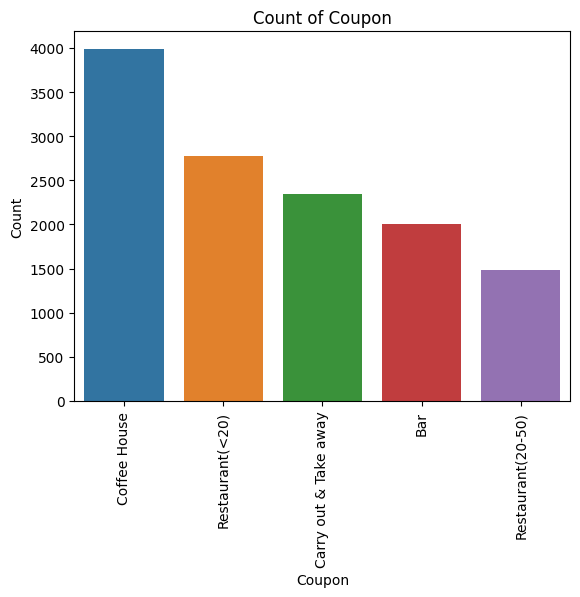

In [28]:
# showing the coupon count in a bar chart using seaborn barplot method
sns.barplot(coupon_counts, x= 'coupon', y= 'count', hue='coupon')
plt.title('Count of Coupon')
plt.xlabel('Coupon')
plt.ylabel('Count')
plt.xticks(rotation=90)

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Restaurant(<20)'),
  Text(1, 0, 'Coffee House'),
  Text(2, 0, 'Carry out & Take away'),
  Text(3, 0, 'Bar'),
  Text(4, 0, 'Restaurant(20-50)')])

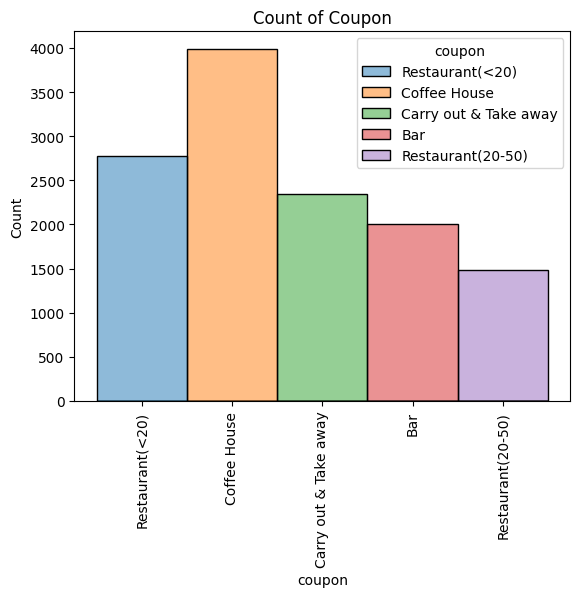

In [51]:
# Histogram for coupon also done by using histplot method from seaborn
sns.histplot(data,x= 'coupon', hue= 'coupon')
plt.title('Count of Coupon')
plt.xticks(rotation=90)

6. Use a histogram to visualize the temperature column.

Text(0, 0.5, 'Count of drivers')

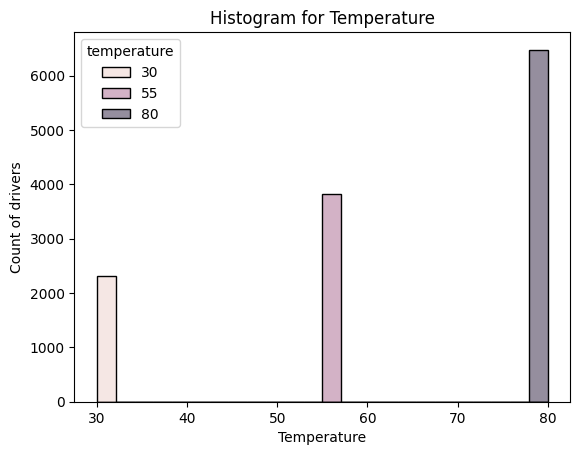

In [29]:
# Using the histplot method of seaborn to create histogram for temperature
sns.histplot(data, x= 'temperature', hue= 'temperature' )
plt.title('Histogram for Temperature')
plt.xlabel('Temperature')
plt.ylabel('Count of drivers')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [30]:
# From the data, querying out data where coupon == Bar and putting in new data frame named DataBar
DataBar= data.query("coupon == 'Bar'")
DataBar.head(5)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


In [17]:
#DataBarDuplicate = DataBar.duplicated(keep=False)
#DataBarDuplicate

#duplicates = DataBar.duplicated(keep=False)
#print("Duplicates:")
#print(DataBar[duplicates])
#so there are 14 duplicates in our record for DataBar which needs to be removed for further analysis

Duplicates:
          destination  passanger weather  temperature  time coupon expiration  \
6958  No Urgent Place  Friend(s)   Rainy           55  10PM    Bar         2h   
6962  No Urgent Place    Partner   Sunny           30  10AM    Bar         1d   
6970             Home      Alone   Sunny           80   6PM    Bar         2h   
7394  No Urgent Place     Kid(s)   Rainy           55  10PM    Bar         1d   
7395  No Urgent Place     Kid(s)   Snowy           30   6PM    Bar         1d   
7401  No Urgent Place  Friend(s)   Rainy           55  10PM    Bar         2h   
7409             Home      Alone   Sunny           80   6PM    Bar         2h   
7843  No Urgent Place  Friend(s)   Rainy           55  10PM    Bar         2h   
7847  No Urgent Place    Partner   Sunny           30  10AM    Bar         1d   
7855             Home      Alone   Sunny           80   6PM    Bar         2h   
8496  No Urgent Place     Kid(s)   Rainy           55  10PM    Bar         1d   
8497  No Urgent 

2. What proportion of bar coupons were accepted?

In [ ]:
# To find this proportions following steps have been taken

# 1. Find the total Bar Coupon Count
# 2. Find the count of Bar Coupons that were accepted
# 3. Find the proportion by dividing 1 with 2

In [31]:
BarCouponCount = data.query("coupon =='Bar'").shape[0]
BarCouponCount
#BarCouponCount = 2010

2010

In [32]:
BarCouponAccepted = data.query("coupon =='Bar' and Y==1").shape[0]
BarCouponAccepted
#BarCouponAccepted = 824

824

In [33]:

ProportionBarAccepted = (BarCouponAccepted/BarCouponCount)*100
ProportionBarAccepted
# ProportionBarAccepted = 
# Meaning almost 40% of bar coupons are accepted


40.99502487562189

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [78]:
data_13_bar = DataBar[DataBar.Bar == '1~3']

In [79]:
data_13_bar_accepted = data_13_bar[data_13_bar.Y == 1]

In [81]:
data_13_bar_accepted.shape[0] / data_13_bar.shape[0] * 100

64.73551637279597

In [85]:
DataBar[DataBar.Bar.isin(['never', 'less1', '1~3'])].Y.mean() * 100

np.float64(37.051352843732744)

In [86]:
DataBar[~DataBar.Bar.isin(['never', 'less1', '1~3'])].Y.mean() * 100

np.float64(76.88442211055276)

In [84]:
DataBar.Bar.value_counts()

Bar
never    851
less1    563
1~3      397
4~8      150
gt8       49
Name: count, dtype: int64

In [ ]:
DataBar[DataBar.Bar ~= '1~3'].Y.mean() * 100

In [34]:
# Find count of passangers who visited bar less 3 or fewer times i.e. between 1 to 3 times
AcceptedLessThan3Visit = DataBar.query("Bar == '1~3' and Y ==1").shape[0]
AcceptedLessThan3Visit
#AcceptedLessThan3Visit = 257


257

In [37]:
# Count of drivers who visits bar less than 3 times
Visited_1_3_Bar = DataBar.query("Bar=='1~3'").shape[0]
Visited_1_3_Bar

397

In [38]:
# Calculate the Acceptance Rate for LessThan 3 Visits by dividing with the Visited_1_3_Bar
AcceptanceRateLessThan3Visit =(AcceptedLessThan3Visit/Visited_1_3_Bar)*100
print("Acceptance Rate Less Than 3 Visit", AcceptanceRateLessThan3Visit)

Acceptance Rate Less Than 3 Visit 64.73551637279597


In [39]:
# Find count of passangers who visited bar more than 3 times and accepted the coupon

AcceptedMoreThan3Visit = len(DataBar.query("(Bar== '4~8' or Bar == 'gt8') and (Y==1)"))
AcceptedMoreThan3Visit
#AcceptedMoreThan3Visit = 153


153

In [40]:
# # Find count of passangers who visited bar more than 3 times 

Visited_GT3_Bar = DataBar.query("Bar== '4~8' or Bar == 'gt8'").shape[0]
Visited_GT3_Bar

199

In [41]:
# Calculate the Acceptance Rate for more Than 3 Visits by dividing by the Visited_GT3_Bar

AcceptanceRateMoreThan3Visit = (AcceptedMoreThan3Visit/Visited_GT3_Bar)*100
print("Acceptance Rate more Than 3 Visit", AcceptanceRateMoreThan3Visit)


Acceptance Rate more Than 3 Visit 76.88442211055276


In [42]:
print("Acceptance Rate Less Than 3 Visit", AcceptanceRateLessThan3Visit)
print("Acceptance Rate more than 3 visit" ,AcceptanceRateMoreThan3Visit)


Acceptance Rate Less Than 3 Visit 64.73551637279597
Acceptance Rate more than 3 visit 76.88442211055276


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [47]:
# Find the count of drivers who go to a bar more than once a month and are over the age of 25 and accepted coupon
DriverAgeGT25_BarGT1= DataBar.query("age>25 and (Bar=='1~3' or Bar =='4~8'  or Bar == 'gt8') and Y==1 ").shape[0]
DriverAgeGT25_BarGT1 

292

In [48]:
# Find the count of drivers who go to a bar more than once a month and are over the age of 25
DriverAgeGT25= DataBar.query("age>25 and (Bar=='1~3' or Bar =='4~8'  or Bar == 'gt8')  ").shape[0]
DriverAgeGT25

420

In [49]:
#Calculate the acceptance rate by dividing with the BarCouponCount
Acpt1_qstn4 = (DriverAgeGT25_BarGT1/DriverAgeGT25)*100
Acpt1_qstn4


69.52380952380952

In [54]:
# Find the count of drivers other drivers who accepted coupon
OthersAccepted = DataBar.query("age<=25 and (Bar=='never' or Bar =='less1' ) and Y==1").shape[0]
OthersAccepted

129

In [56]:
# Find the count of drivers other drivers

OthersOffered =DataBar.query("age<=25 and (Bar=='never' or Bar =='less1' ) ").shape[0]
OthersOffered                         

328

In [57]:
# Acceptance Rate of ther drivers is calculated by dividing the count of other drivers with the BarCouponCount
Acpt2_qstn4 = (OthersAccepted/OthersOffered)*100
Acpt2_qstn4 

39.329268292682926

In [59]:
print("Drivers who go to a bar more than once a month and are over the age of 25", Acpt1_qstn4)
print("Other drivers" ,Acpt2_qstn4)


Drivers who go to a bar more than once a month and are over the age of 25 69.52380952380952
Other drivers 39.329268292682926


In [1]:

#DriverAgeGT25_BarGT1= DataBar.query("age>25 and (Bar=='1~3' or Bar =='4~8'  or Bar == 'gt8') and Y==1 ").shape[0]
#DriverAgeGT25_BarGT1 


#Others = DataBar.query("not (age>25 and (Bar=='1~3' or Bar =='4~8'  or Bar == 'gt8') and Y==1)").shape[0]
#Others

#Acpt1_qstn4 = (DriverAgeGT25_BarGT1/BarCouponCount)*100
#Acpt1_qstn4 = 14.476945959345564

#Acpt2_qstn4 = (Others/BarCouponCount)*100
#Acpt2_qstn4 = 85.52305404065443

#Meaning those who go to Bar more than once and month and age>25 were less likely to accept bar coupons

#AcceptanceRateRatio = (DriverAgeGT25_BarGT1/Others)*100
#AcceptanceRateRatio
#Note: The Age column has string values- as a part of data cleanup job we got to convert the age column values to int first
#Note: It would be better if the values in the columns which has ranges can be converted to their mean values


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [ ]:
#sub_pop_df = data[data.BAR.isin([...]) & ~data.passanger.isin(['kid']) & ~data.occupation.isin([....])]
#sub_pop_df.Y.mean() * 100

In [ ]:
#sub_pop_df[sub_pop_df.Y == 1].shape[0] / sub_pop_df.shape[0] * 100

In [63]:
# Find the count of drivers who meet all the 3 conditions and accepted
bar_count_fr_qstn_5= ['1~3', '4~8', 'gt8']
dr_qstn_5_Acptd = DataBar.query("Bar in @bar_count_fr_qstn_5 and passanger != 'kid(s)'and occupation !='Farming Fishing & Forestry' and Y==1").shape[0]
dr_qstn_5_Acptd

410

In [64]:
# Find the count of drivers who meet all the 3 conditions
driverset_fr_qstn_5 = DataBar.query("Bar in @bar_count_fr_qstn_5 and passanger != 'kid(s)' and occupation !='Farming Fishing & Forestry'").shape[0]
driverset_fr_qstn_5

596

In [66]:
# Caclulate the acceptance rate by dividing  driverset_fr_qstn_5_Accepted by driverset_fr_qstn_5
Acpt1_qstn5 = (dr_qstn_5_Acptd/driverset_fr_qstn_5)*100
Acpt1_qstn5 

68.79194630872483

In [75]:
# Find the count of drivers who doesn't meet any of the 3 conditions

OtherQstn5  = DataBar.query(" not(Bar in @bar_count_fr_qstn_5 and passanger != 'kid(s)' and occupation !='Farming Fishing & Forestry')")
OtherQstn5Count =OtherQstn5.shape[0]
OtherQstn5Count

1414

In [76]:
# Find the count of drivers who doesn't meet any of the 3 conditions and accepted

OtherQstn5Accepted = OtherQstn5[OtherQstn5.Y==1].shape[0]
OtherQstn5Accepted


414

In [77]:
# Calculate the acceptance rate by dividing OtherQstn5Accepted with OtherQstn5
Accpt2_qstn5 = (OtherQstn5Accepted/OtherQstn5Count)*100
Accpt2_qstn5

29.27864214992928

In [78]:
print("Acceptance rate of Drivers who meet the condition", Acpt1_qstn5)
print("Acceptance rato of Drivers who doesn't meet the condition" ,Accpt2_qstn5)


Acceptance rate of Drivers who meet the condition 68.79194630872483
Acceptance rato of Drivers who doesn't meet the condition 29.27864214992928


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [149]:
# Setting same variables for ease of qurying
income_lt50 = ['$37500 - $49999','$12500 - $24999','$25000 - $37499','Less than $12500']
bar_count_fr_qstn_5 = ['1~3', '4~8', 'gt8']

In [150]:
# Setting up the condition

data_cond1 = DataBar.Bar.isin(bar_count_fr_qstn_5) & (DataBar.passanger != 'Kids(s)' ) & (DataBar.maritalStatus != 'widowed')
data_cond2 = DataBar.Bar.isin(bar_count_fr_qstn_5) & (DataBar.age<30)
data_cond3 = DataBar.RestaurantLessThan20.isin(['4~8','gt8']) & (DataBar.income.isin(income_lt50))

combined_condition = data_cond1 | data_cond2 | data_cond3

In [163]:
# Find the count of drivers who meet the 3 conditions and were offered

data_qstn_6= DataBar[combined_condition]
data_qstn_6
data_qstn_6_count =data_qstn_6.shape[0]
data_qstn_6_count

810

In [164]:
# Find the count of drivers who meet 3 conditions and accepted

data_qstn_6_Y_count = data_qstn_6[data_qstn_6.Y==1].shape[0]
data_qstn_6_Y_count

466

In [165]:
# Find the acceptance rate 
Accpt_Rt_Qstn_6 = (data_qstn_6_Y_count/data_qstn_6_count)*100
Accpt_Rt_Qstn_6

57.53086419753086

In [167]:
# Find the count of drivers who doesn't meet the above condition
data_qstn_6_Not_Cond = DataBar[~combined_condition]
data_qstn_6_Not_Cond
data_qstn_6_Not_Cond_count = data_qstn_6_Not_Cond.shape[0]
data_qstn_6_Not_Cond_count

1200

In [170]:
# Find the count of drivers who doesn't meet the above condition and Accepted
data_qstn_6_Not_Cond = DataBar[~combined_condition] 
data_qstn_6_Not_Cond_Ac = data_qstn_6_Not_Cond[data_qstn_6_Not_Cond.Y==1]
data_qstn_6_Not_Cond_Ac_count = data_qstn_6_Not_Cond_Ac.shape[0]
data_qstn_6_Not_Cond_Ac_count


358

In [171]:
# Find the Acceptance Rate of drivers who doesn't meet the above condition
Acpt_Rt_Qstn_6_No_Cond = (data_qstn_6_Not_Cond_Ac_count/data_qstn_6_Not_Cond_count)*100
Acpt_Rt_Qstn_6_No_Cond

29.833333333333336

In [172]:
# Compare the acceptance rate of drivers who meet the given 3 conditions vs the acceptance rate of drivers who doesn't meet the above 3 conditions
print("Acceptance rate of drivers who meet the 3 conditions", Accpt_Rt_Qstn_6)
print("Acceptance rate of drivers who doesn't meet the 3 conditions", Acpt_Rt_Qstn_6_No_Cond)

Acceptance rate of drivers who meet the 3 conditions 57.53086419753086
Acceptance rate of drivers who doesn't meet the 3 conditions 29.833333333333336


In [ ]:
# Clearly the acceptance rate of such drivers who meet the conditions is much higher than those don't meet these conditions

In [148]:
#Set Conditions 
#Data_Cond1 = DataBar.query("Bar in@bar_count_fr_qstn_5 and passanger != 'Kids(s)' and maritalStatus != 'widowed' ") 
#Data_Cond2 = DataBar.query("Bar in@bar_count_fr_qstn_5 and age<30")
#Data_Cond3 = DataBar.query(" (RestaurantLessThan20 == '4~8' or RestaurantLessThan20 == 'gt8') and (income in@income_lt50)") 

#data_cond1 = DataBar.Bar.isin(bar_count_fr_qstn_5) & (DataBar.passanger != 'Kids(s)' ) & (DataBar.maritalStatus != 'widowed')
#data_cond2 = DataBar.Bar.isin(bar_count_fr_qstn_5) & (DataBar.age<30)
#data_cond3 = DataBar.RestaurantLessThan20.isin(['4~8','gt8']) & (DataBar.income.isin(income_lt50))

#combined_condition = data_cond1 | data_cond2 | data_cond3
#data_qstn_5= DataBar[combined_condition]
#data_qstn_5_Y = data_qstn_5[data_qstn_5.Y==1] 
#data_qstn_5_Y
#data_cond = DataBar.query(("(Bar in@bar_count_fr_qstn_5 and passanger != 'Kids(s)' and maritalStatus != 'widowed')" )| ("(Bar in@bar_count_fr_qstn_5 and age<30)") | ("(RestaurantLessThan20 == '4~8' or RestaurantLessThan20 == 'gt8') and (income in@income_lt50)"))
#data_cond



# data[data.BAR.isin([...]) 

#condition_1 = DataBar[DataBar.Bar.isin(bar_count_fr_qstn_5)] and 
#condition_2 = DataBar['passanger]!= 'kid(s)' and DataBar[maritalStatus]!= 'widowed'
#condition_2

#condition_1 = (OtherQstn5['Bar'] > 1) & (OtherQstn5['passanger'] != "Kid(s)") & (OtherQstn5['maritalStatus'] != "Widowed")

#condition1 = DataBar['maritalStatus'] != "Widowed"
#condition2 = DataBar['passanger'] != 'Kids(s)'



,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,0,0,1,0,1
90,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,1~3,less1,1~3,1,0,0,0,1,1
101,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,1~3,less1,1~3,1,0,0,1,0,1
112,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,26,Unmarried partner,...,gt8,4~8,1~3,less1,1,0,0,0,1,1
123,Home,Alone,Sunny,55,6PM,Bar,1d,Male,26,Unmarried partner,...,gt8,4~8,1~3,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12482,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Female,26,Unmarried partner,...,never,4~8,4~8,less1,1,1,0,0,1,1
12485,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Female,26,Unmarried partner,...,never,4~8,4~8,less1,1,1,0,0,1,1
12488,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Female,26,Unmarried partner,...,never,4~8,4~8,less1,1,1,0,0,1,1
12525,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,21,Unmarried partner,...,never,gt8,4~8,1~3,1,1,0,0,1,1


In [5]:
#condition_1= DataBar.query("Bar in@bar_count_fr_qstn_5 and passanger != 'Kids(s)' and passanger != 'widowed' and Y==1 ").shape[0]
#condition_1
#condition_1= 410

#Acpt1_qstn6 = (condition_1/BarCouponCount)*100
#Acpt1_qstn6  
#Acpt1_qstn6= 20.32721864154685

#condition_2= DataBar.query("Bar in@bar_count_fr_qstn_5 and age<30 and Y==1").shape[0]
#condition_
#condition_2=249
#Acpt2_qstn6 = (condition_2/BarCouponCount)*100
#Acpt2_qstn6
#Acpt2_qstn6= 12.345066931085771

#income_lt50 = ['$37500 - $49999','$12500 - $24999','$25000 - $37499','Less than $12500']
#condition_3 = DataBar.query(" (RestaurantLessThan20 == '4~8' or RestaurantLessThan20 == 'gt8') and (income in@income_lt50) and Y==1 ").shape[0]
#condition_3
#condition_ = 156

#Acpt3_qstn6 = (condition_3/BarCouponCount)*100
#Acpt3_qstn6 

#Acpt3_qstn6= 7.734258800198314

#Acpt4_qstn6 = ((condition_1 + condition_2+ condition_3)/BarCouponCount)*100
#Acpt4_qstn6

#Acpt4_qstn6= 40.406544372830936


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
# Hpothesis so far is that- 
# 1. drivers who goes to Bar more than once a month are more likely to accept the Bar coupon
# 2. drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, 
     #fishing, or forestry. are more likely to accept the Bar coupon




### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [ ]:
# 1. Find acceptance rate of customers who visited restaurants 20-50(high end restaurants) having kids vs not having kids
# 2. Find acceptance rate of customers who visited restaurants 20-50(high end restaurants) having earning more than 50K
# 3. Find acceptance rate of customers who visited restaurants 20-50(high end restaurants) having kids and high earning
# 4. Find acceptance rate of customers who visited restaurants 20-50(high end restaurants) having kids and high earning - Who visited less than once 
# a month vs who visited more than a month

# 5. compare direction same vs opposite from query 4



In [107]:
# Making arrays of High Income and low Income groups
HighIncome =['$50000 - $62499', '$62500 - $74999', '$75000 - $87499', '$87500 - $99999', '$100000 or More']
lowIncome = ['Less than $12500' ,'$12500 - $24999', '$25000 - $37499', '$37500 - $49999']
VstMorthan3 = ['gt8','4~8']


In [109]:
# Find the count of drivers who accepted high income restaurant
TotalCsrstddHighEndRst = data.query(" coupon == 'Restaurant(20-50)' and Y==1 ").shape[0]
TotalCsrstddHighEndRst   


657

In [110]:
# Find the count of drivers visited high income restaurant 
TotalCsrOfrdHighEndRst = data.query(" coupon == 'Restaurant(20-50)' ").shape[0]
TotalCsrOfrdHighEndRst   


1488

In [113]:
#Acceptance rate of drivers who accepted high end restaurant coupon 
Acptnc_Rate_High_End_Rst = (TotalCsrstddHighEndRst/TotalCsrOfrdHighEndRst)*100
Acptnc_Rate_High_End_Rst

44.153225806451616

In [122]:
# Find the count of drivers visited high income restaurant more than 3 times a month and and Accepted
drivers_visited_high_rest_and_accepted = data.query(" coupon == 'Restaurant(20-50)' and Y==1 and Restaurant20To50 in @VstMorthan3").shape[0]
drivers_visited_high_rest_and_accepted

79

In [123]:
# Find the count of drivers visited high income restaurant more than 3 times a month
drivers_visited_high_rest = data.query(" coupon == 'Restaurant(20-50)' and Restaurant20To50 in @VstMorthan3").shape[0]
drivers_visited_high_rest

123

In [124]:
#Calculate the acceptance rate of drivers visiting high end restaurant more than 3 times a month accepting high end restaurant coupon
AccptRtHigh= (drivers_visited_high_rest_and_accepted/drivers_visited_high_rest)*100
AccptRtHigh

64.22764227642277

In [6]:
#Find unique values in income column
#unique_income = data['income'].unique()
#unique_income
#HighIncome =['$50000 - $62499', '$62500 - $74999', '$75000 - $87499', '$87500 - $99999', '$100000 or More']
#lowIncome = ['Less than $12500' ,'$12500 - $24999', '$25000 - $37499', '$37500 - $49999']

#TotalCsrVstdHighEndRst = data.query(" coupon == 'Restaurant(20-50)' and Y==1 ").shape[0]
#TotalCsrVstdHighEndRst   
#TotalCsrVstdHighEndRst= 656

#CsrVstdHighEndRstHighIncome = data.query("income in @HighIncome and Y==1 and coupon == 'Restaurant(20-50)' " ).shape[0]
#CsrVstdHighEndRstHighIncome
#CsrVstdHighEndRstHighIncome =325

#Proportion = (CsrVstdHighEndRstHighIncome/TotalCsrVstdHighEndRst)*100
#Proportion = 49.542682926829265


#CsrVstdHighEndRstLowIncome =  data.query("income in @lowIncome and Y==1 and coupon == 'Restaurant(20-50)' " ).shape[0]

In [ ]:
# Find the percentage of customers who accepted  high end restaurant coupon were alone



In [128]:
# Find the count of drivers who accepted  high end restaurant coupon were alone
drvr_alone_acpt = data.query(" coupon == 'Restaurant(20-50)' and Y== 1 and passanger =='Alone'").shape[0]
drvr_alone_acpt

426

In [127]:
# Find the count of drivers who were offered  high end restaurant coupon were alone
drvr_alone_ofrd = data.query(" coupon == 'Restaurant(20-50)' and passanger =='Alone'").shape[0]
drvr_alone_ofrd

1006

In [129]:
#calculate percentage of drivers accepting high end restaurant who are alone
Accpt_Rt_high_Alone =  (drvr_alone_acpt/drvr_alone_ofrd)*100
Accpt_Rt_high_Alone

42.34592445328032

In [130]:
# Find the count of drivers who accepted  high end restaurant coupon were not alone
drvr_Notalone_acpt = data.query(" coupon == 'Restaurant(20-50)' and Y== 1 and passanger !='Alone'").shape[0]
drvr_Notalone_acpt

231

In [131]:
# Find the count of drivers who were offered  high end restaurant coupon were not alone
drvr_Notalone_ofrd = data.query(" coupon == 'Restaurant(20-50)' and passanger !='Alone'").shape[0]
drvr_Notalone_ofrd

482

In [132]:
#calculate percentage of drivers accepting high end restaurant who are alone
Accpt_Rt_high_NotAlone =  (drvr_Notalone_acpt/drvr_Notalone_ofrd)*100
Accpt_Rt_high_NotAlone

47.9253112033195

In [134]:
print("Acceptance rate of Drivers who accepted high end restaurant and were alone", Accpt_Rt_high_Alone)
print("Acceptance rato of Drivers who accepted high end restaurant and were not alone",Accpt_Rt_high_NotAlone)




Acceptance rate of Drivers who accepted high end restaurant and were alone 42.34592445328032
Acceptance rato of Drivers who accepted high end restaurant and were not alone 47.9253112033195


In [ ]:
# Conclusion
#Clearly Acceptance rato of Drivers who accepted high end restaurant and were not alone is higer than 
#Acceptance rate of Drivers who accepted high end restaurant and were alone"

In [48]:
# Find the percentage of customers who visited high end restaurants were accompanied by kids

CsrVstdHighEndRstHvngKids = data.query(" coupon == 'Restaurant(20-50)' and Y==1  and passanger == 'Kid(s)'").shape[0]
CsrVstdHighEndRstHvngKids
CsrVstdHighEndRstHvngKids =63

CsrVstdHighEndRstAlone = data.query(" coupon == 'Restaurant(20-50)' and Y==1  and passanger == 'Alone'").shape[0]
CsrVstdHighEndRstAlone

#CsrVstdHighEndRstAlone = 426 : This is surprising. customers alone are going to high end restaurants more

#Proportion2 = (CsrVstdHighEndRstAlone/TotalCsrVstdHighEndRst)*100
#Proportion2 = 64.9390243902439 : 64 % of customers traveling Alone has visited high end restaurants

# Find how many of this 64% were travling were on the direction vs how many were against

#CsrVstdHighEndRstAloneTrvlingInDrctn = data.query(" coupon == 'Restaurant(20-50)' and Y==1  and passanger == 'Alone' and direction_same==1").shape[0]
#CsrVstdHighEndRstAloneTrvlingInDrctn = 93

#CsrVstdHighEndRstAloneTrvlingOppDrctn = data.query(" coupon == 'Restaurant(20-50)' and Y==1  and passanger == 'Alone' and direction_opp ==1").shape[0]
#CsrVstdHighEndRstAloneTrvlingOppDrctn = 333

#Findings- Customer driving alone has high chance of going to a high end restaurant



78

In [ ]:
# Find what proportion of coffee house coupons were accepted
# Find which type of customers are likely to visit coffee houses
# Find which type of customers visited coffee house the most



In [135]:
coffee= data.query(" Y==1 and coupon == 'Coffee House' ")
coffee

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,1,0,0,1,1
16,Work,Alone,Sunny,55,7AM,Coffee House,2h,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,1,1,0,1,1
21,Work,Alone,Sunny,55,7AM,Coffee House,2h,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,1,0,0,1,1
45,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,1
48,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12579,Home,Alone,Rainy,55,10PM,Coffee House,2h,Male,21,Single,...,never,1~3,1~3,less1,1,0,0,1,0,1
12601,Home,Alone,Rainy,55,10PM,Coffee House,2h,Female,51,Divorced,...,less1,1~3,1~3,less1,1,0,0,1,0,1
12608,Work,Alone,Snowy,30,7AM,Coffee House,1d,Female,51,Divorced,...,less1,1~3,1~3,less1,1,0,0,1,0,1
12624,Home,Alone,Rainy,55,10PM,Coffee House,2h,Female,21,Unmarried partner,...,4~8,1~3,1~3,less1,1,0,0,1,0,1


Text(0, 0.5, 'Driver Count')

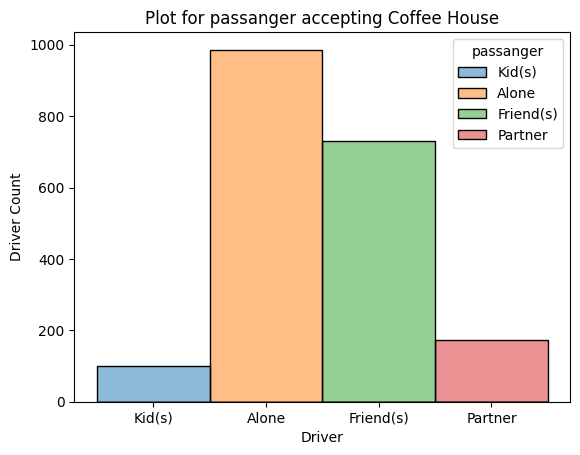

In [138]:
sns.histplot(coffee, x= 'passanger', hue ='passanger')
plt.title('Plot for passanger accepting Coffee House')
plt.xlabel('Driver')
plt.ylabel('Driver Count')
           

In [ ]:
# histogram clearly shows that passanger who travel alone or with friends visited coffee house the most

In [ ]:
# Creating a histogram to see the type of passangers who accepted coffee house coupon. 

C:\Users\viksaraw\AppData\Local\Temp\ipykernel_6084\180081030.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='best')


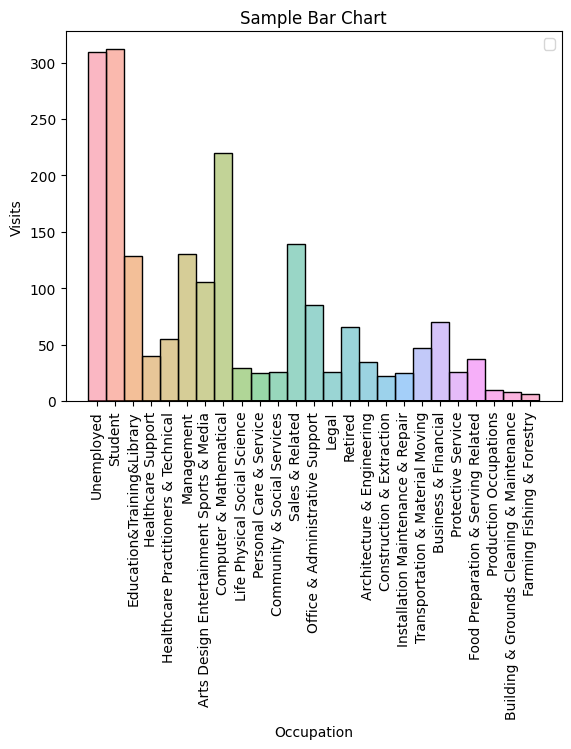

In [58]:
sns.histplot(coffee, x= 'occupation', hue ='occupation')
plt.xticks(rotation = 90)
plt.xlabel('Occupation')
plt.ylabel('Visits')
plt.title('Sample Bar Chart')
plt.legend(loc='best')
plt.show()

In [ ]:
# graph clearly shows that unemployed and students were the highest visitors at coffee house